In [1]:
# Packages
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
img = cv2.imread("../data/input/input1.png")

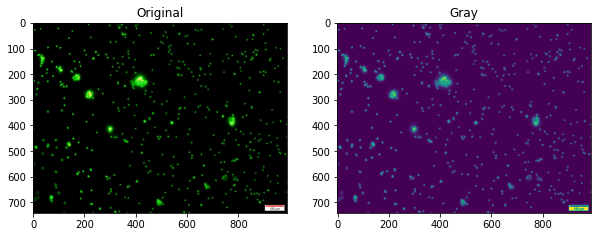

In [3]:
''' Step 1. Gray the Image

cv2.cvtColor(src, code):
    Args:
        src: input image
        code: color space conversion method, here we use COLOR_BGR2GRAY to get gray image
'''

# Process
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY) 

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(img)
ax[1].imshow(gray)

ax[0].title.set_text('Original')
ax[1].title.set_text('Gray')

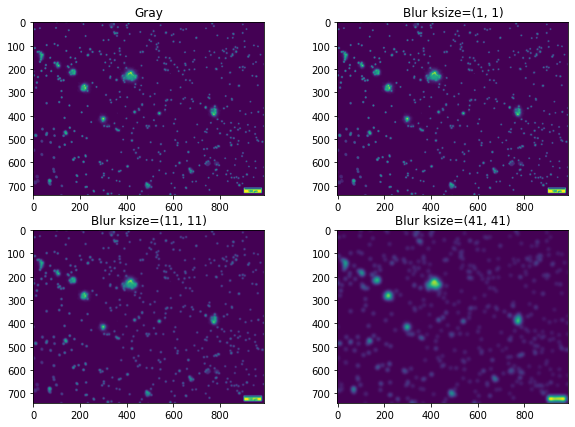

In [4]:
''' Step 2. Remove noise by Gaussian Blur

cv2.GaussianBlur(src, ksize, sigmaX):
    Args:
        src: input image
        ksize: gaussian kernel size (must be positive and odd)
        sigmaX: gaussian kernel standard diviation in x direction 
'''

# Process
blur1 = cv2.GaussianBlur(src=gray,ksize=(1,1),sigmaX=0)
blur2 = cv2.GaussianBlur(src=gray,ksize=(11,11),sigmaX=0)
blur3 = cv2.GaussianBlur(src=gray,ksize=(43,43),sigmaX=0)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].imshow(gray)
ax[0, 1].imshow(blur1)
ax[1, 0].imshow(blur2)
ax[1, 1].imshow(blur3)

ax[0, 0].title.set_text('Gray')
ax[0, 1].title.set_text('Blur ksize=(1, 1)')
ax[1, 0].title.set_text('Blur ksize=(11, 11)')
ax[1, 1].title.set_text('Blur ksize=(41, 41)')

blur = blur2

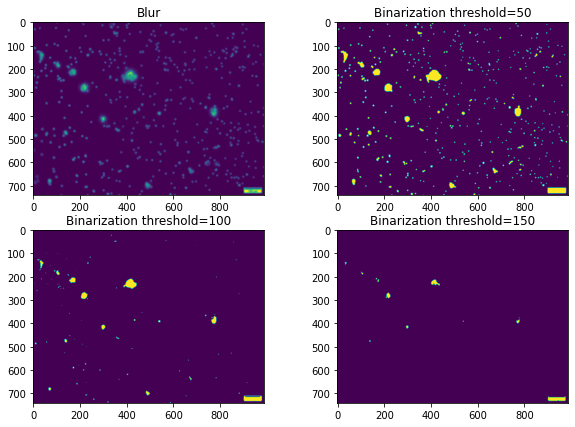

In [5]:
''' Step 3. Binarization

cv2.threshold(src, thresh, maxval, type):
    Args:
        src: input image
        thresh: threshold, pixels lower than this value will be flitered 
        maxval: the value we want to set for pixels over the threshold
        type: ref: opencv/thresh_binary
'''

# Process
retval1, dst1 = cv2.threshold(blur, 50, 255, 0, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
retval2, dst2 = cv2.threshold(blur, 100, 255, 0, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
retval3, dst3 = cv2.threshold(blur, 150, 255, 0, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].imshow(blur)
ax[0, 1].imshow(dst1)
ax[1, 0].imshow(dst2)
ax[1, 1].imshow(dst3)

ax[0, 0].title.set_text('Blur')
ax[0, 1].title.set_text('Binarization threshold=50')
ax[1, 0].title.set_text('Binarization threshold=100')
ax[1, 1].title.set_text('Binarization threshold=150')

dst = dst1

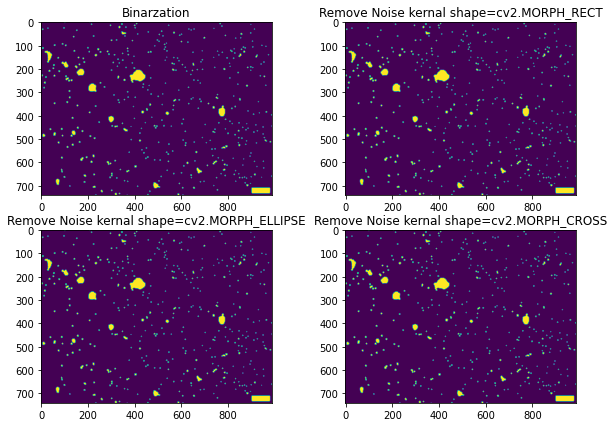

In [6]:
''' Step 4. Remove Noise

cv2.getStructuringElement(shape, ksize):
    Args:
        shape: element shape, rectangular(cv2.MORPH_RECT), cross(cv2.MORPH_CROSS), or ellipse(cv2.MORPH_ELLIPSE)
        ksize: size of structuring element

cv2.morphologyEx(src, op, kernel):
    Args:
        src: input image
        op: method, opening(cv2.MORPH_OPEN), closing(cv2.MORPH_CLOSE), etc
        kernel: structuring element
'''

# Process
kernel1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(1, 1))
kernel2 = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(1, 1))
kernel3 = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(1, 1))

rmnoise1 = cv2.morphologyEx(src=dst, op=cv2.MORPH_OPEN, kernel=kernel1)
rmnoise2 = cv2.morphologyEx(src=dst, op=cv2.MORPH_OPEN, kernel=kernel2)
rmnoise3 = cv2.morphologyEx(src=dst, op=cv2.MORPH_OPEN, kernel=kernel3)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].imshow(dst)
ax[0, 1].imshow(rmnoise1)
ax[1, 0].imshow(rmnoise2)
ax[1, 1].imshow(rmnoise3)

ax[0, 0].title.set_text('Binarzation')
ax[0, 1].title.set_text('Remove Noise kernal shape=cv2.MORPH_RECT')
ax[1, 0].title.set_text('Remove Noise kernal shape=cv2.MORPH_ELLIPSE')
ax[1, 1].title.set_text('Remove Noise kernal shape=cv2.MORPH_CROSS')

rmnoise = rmnoise2

In [7]:
''' Step 5. Find all items

cv2.findContours(image, mode, method):
    Args:
        image: image to be processed
        mode: contour retrieval mode, extreme(cv2.RETR_EXTERNAL), 
            ignore hierarchical relationship(cv2.RETR_LIST) or 
            consider hierarchical relationship(cv2.RETR_TREE)
        method: contour approximation method, 
            absolutely all points(cv2.CHAIN_APPROX_NONE) or
            compresses horizontal etc(cv2.CHAIN_APPROX_SIMPLE)
'''

# Process
contours1, hierarchy1 = cv2.findContours(image=rmnoise, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(image=rmnoise, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
contours3, hierarchy3 = cv2.findContours(image=rmnoise, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
contours4, hierarchy4 = cv2.findContours(image=rmnoise, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

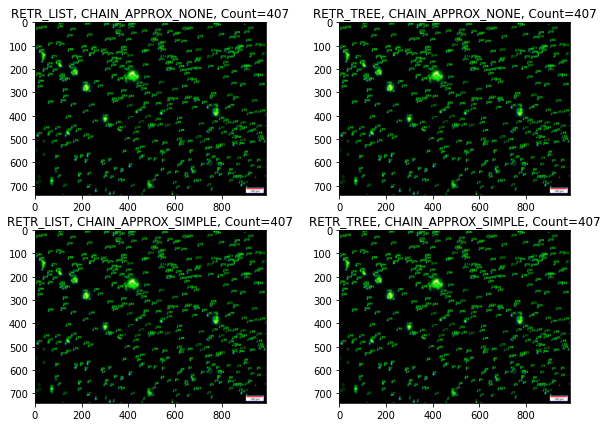

In [12]:
''' Step 6. Draw items '''

def DrawItems(src, contours, threshold):
    count = 0

    for cont in contours:
        if cv2.contourArea(cont) < threshold: 
            continue
        count += 1 

        rect = cv2.boundingRect(cont)
        cv2.rectangle(src, rect, (0, 0, 0xff), 1)

        y = 10 if rect[1] < 10 else rect[1]
        cv2.putText(src, str(count), (rect[0], y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
        
    return src, count


# Process
output1, result1 = DrawItems(src=img, contours=contours1, threshold=5)
output2, result2 = DrawItems(src=img, contours=contours2, threshold=5)
output3, result3 = DrawItems(src=img, contours=contours3, threshold=5)
output4, result4 = DrawItems(src=img, contours=contours4, threshold=5)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].imshow(output1)
ax[0, 1].imshow(output2)
ax[1, 0].imshow(output3)
ax[1, 1].imshow(output4)

ax[0, 0].title.set_text('RETR_LIST, CHAIN_APPROX_NONE, Count='+str(result1))
ax[0, 1].title.set_text('RETR_TREE, CHAIN_APPROX_NONE, Count='+str(result2))
ax[1, 0].title.set_text('RETR_LIST, CHAIN_APPROX_SIMPLE, Count='+str(result3))
ax[1, 1].title.set_text('RETR_TREE, CHAIN_APPROX_SIMPLE, Count='+str(result4))

In [13]:
''' Step 7. Save Result '''

cv2.imwrite('../data/output/output1.png', output2)

True